# Data Preprocessing

This preprocessing file should be utilized to join the data that we have by date.
- The date column should be named "date"
- The date column should have the format in "yyyy-mm"

# Import Files

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path

from datetime import datetime


# Settings

In [2]:
# path to where we store our preprocessed data
data_file_path = Path("../data")
figure_file_path = Path("../figure")

# Load Files

In [21]:
# Target data
df_egg_price = pd.read_csv(f"{data_file_path}/date_organized_egg_price._for_merge.csv", index_col=0)
# Features data
df_us_disasters = pd.read_csv(f"{data_file_path}/df_us_disasters_for_merge.csv", index_col=0)
df_us_diseases = pd.read_csv(f"{data_file_path}/df_us_diseases_for_merge.csv", index_col=0)
df_us_covid = pd.read_csv(f"{data_file_path}/df_us_covid_for_merge.csv", index_col=0)
df_us_weather = pd.read_csv(f"{data_file_path}/df_us_weather_for_merge.csv", index_col=0)
df_us_avian_flu_flock_cnt = pd.read_csv(f"{data_file_path}/df_avian_flu_flock_count_for_merge.csv", index_col=0)
df_us_avian_flu_flock_size = pd.read_csv(f"{data_file_path}/df_avian_flu_flock_size_for_merge.csv", index_col=0)
df_us_avian_flu_human = pd.read_csv(f"{data_file_path}/df_avian_flu_human_for_merge.csv", index_col=0)
df_gas = pd.read_csv(f"{data_file_path}/date_organized_gas_price_for_merge.csv", index_col=0)


In [22]:
df_us_avian_flu_flock_cnt = df_us_avian_flu_flock_cnt.rename(columns={'yyyy_mm': 'date'})
df_us_avian_flu_flock_size = df_us_avian_flu_flock_size.rename(columns={'yyyy_mm': 'date'})
df_us_avian_flu_human = df_us_avian_flu_human.rename(columns={'yyyy_mm': 'date'})

In [27]:
df_full_data = df_egg_price.copy()
# Merge dataset
df_full_data = df_full_data.merge(df_us_disasters, on='date', how='left').rename(columns={'adjusted_deaths': 'disaster_deaths_adjusted', 'log_cpi_adjusted_cost': 'disaster_cost_adjusted', 'log_unadjusted_cost': 'disaster_cost_unadjusted'})
df_full_data = df_full_data.merge(df_us_diseases, on='date', how='left').rename(columns={'outbreaks_per_million': 'human_outbreaks_per_million', 'illnesses_per_million': 'human_illnesses_per_million'})
df_full_data = df_full_data.merge(df_us_covid, on='date', how='left').rename(columns={'hospitalized_per_million': 'covid_hospitalization_per_million'})
df_full_data = df_full_data.merge(df_us_weather, on='date', how='left')
df_full_data = df_full_data.merge(df_us_avian_flu_flock_cnt, on='date', how='left').rename(columns={'Flock_Count': 'infected_flock_cnt'})
df_full_data = df_full_data.merge(df_us_avian_flu_flock_size, on='date', how='left').rename(columns={'Total_Flock_Size': 'infected_bird_cnt'})
df_full_data = df_full_data.merge(df_us_avian_flu_human, on='date', how='left').rename(columns={'People_Count': 'infected_h5n1_people_cnt'})
df_full_data = df_full_data.merge(df_gas, on='date', how='left').rename(columns={'price_per_galon': 'gas_price_per_gallon'})

In [28]:
df_full_data.fillna(0, inplace=True)

In [29]:
df_full_data.columns

Index(['date', 'price_per_dozen', 'disaster_deaths_adjusted',
       'disaster_cost_adjusted', 'disaster_cost_unadjusted',
       'human_outbreaks_per_million', 'human_illnesses_per_million',
       'covid_hospitalization_per_million', 'temp_overall', 'temp_variance',
       'infected_flock_cnt', 'infected_bird_cnt', 'infected_h5n1_people_cnt',
       'gas_price_per_gallon'],
      dtype='object')

In [31]:
df_float_data = df_full_data[['price_per_dozen', 'disaster_deaths_adjusted', 'disaster_cost_adjusted', 
                               'human_outbreaks_per_million', 'human_illnesses_per_million', 
                              'covid_hospitalization_per_million', 'infected_flock_cnt', 'infected_bird_cnt', 'infected_h5n1_people_cnt', 'temp_variance', 'gas_price_per_gallon']].copy()

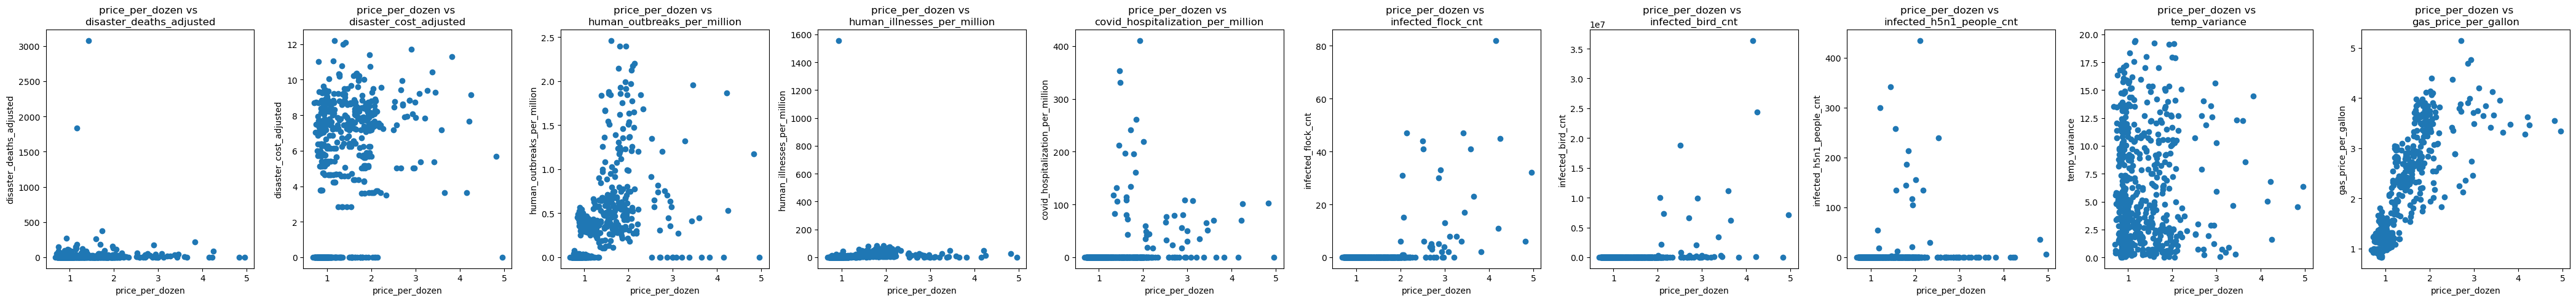

In [33]:
target_column = 'price_per_dozen'
other_columns = list(df_float_data.columns)
other_columns.remove('price_per_dozen')
fig, ax = plt.subplots(1, 10, figsize=(42, 5))
for i, column in enumerate(other_columns):
    if column != target_column:  # Avoid plotting the target column against itself
        ax[i].scatter(df_float_data[target_column], df_float_data[column])
        ax[i].set_title(f'{target_column} vs \n{column}')
        ax[i].set_xlabel(target_column)
        ax[i].set_ylabel(column)
plt.tight_layout()
plt.show()
fig.savefig(f'{figure_file_path}/egg_price_versus_features.jpg') 

In [37]:
# Normalized Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_float_data_x = df_float_data.drop(columns=['price_per_dozen'])
model = scaler.fit(df_float_data_x)
df_float_data_scaled = pd.DataFrame(model.transform(df_float_data_x), columns=df_float_data_x.columns)
df_float_data_scaled['price_per_dozen'] = df_float_data['price_per_dozen']


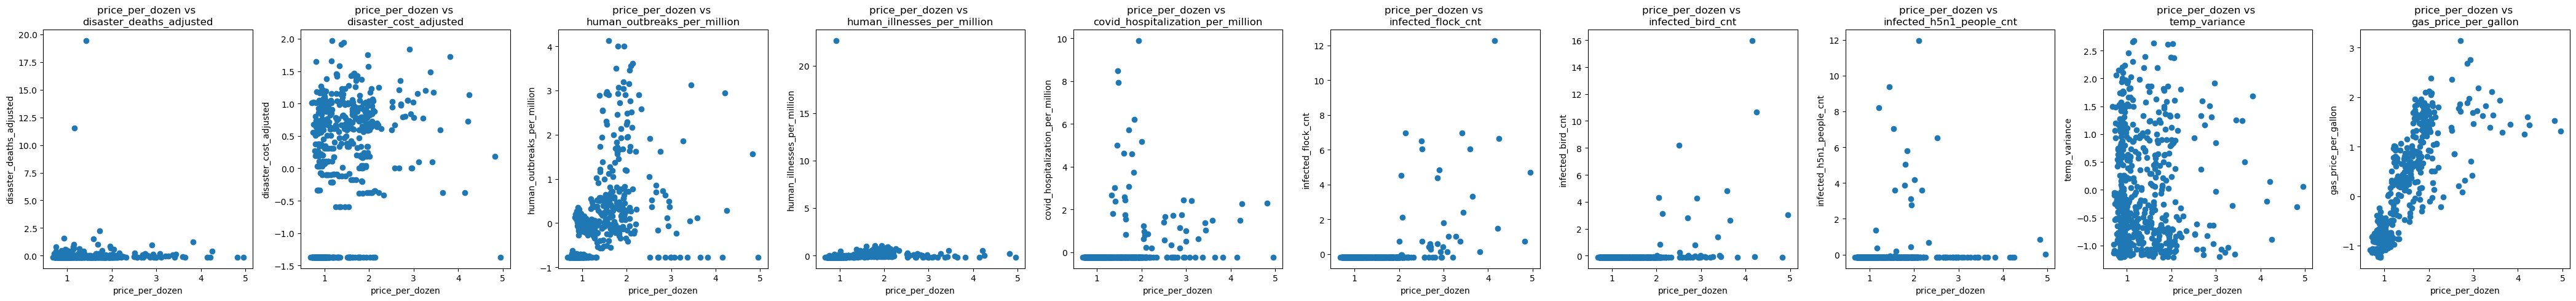

In [40]:
target_column = 'price_per_dozen'
other_columns = list(df_float_data_scaled.columns)
other_columns.remove('price_per_dozen')
fig, ax = plt.subplots(1, 10, figsize=(42, 5))
for i, column in enumerate(other_columns):
    if column != target_column:  # Avoid plotting the target column against itself
        ax[i].scatter(df_float_data_scaled[target_column], df_float_data_scaled[column])
        ax[i].set_title(f'{target_column} vs \n{column}')
        ax[i].set_xlabel(target_column)
        ax[i].set_ylabel(column)
plt.tight_layout()
plt.show()
fig.savefig(f'{figure_file_path}/egg_price_versus_scaled_features.jpg') 

In [39]:
# Save full data
df_float_data.to_csv(f"{data_file_path}/merged_data.csv")
df_float_data_scaled.to_csv(f"{data_file_path}/merged_scaled_data.csv")